# Linear Regression Practical Example Contender Model

## Scoping
### Situation
In the bootcamp, we built a candidate model using OLS with a log transformation of the dependant variable. Candidate model performance metrics indicated an r-squared of 0.745 with MAE of 5,564.

### Goal
Improve upon the candidate model through data pre-processing, feature selection and feature creation.

### Opportunities
Opportunities to improve the model include:
 - Engineer a vehicle age feature using model year and estimated year of the dataset.
 - Oulier handling. Instead of removing the top one percentile of Price outliers, create an imputation to realistic values.
 - Create dummy variables for the vehicle model.
 - in Multicollinearity test, the contender model didn't add a constant to be considered by the VIF as the documentation recommends. Add a constant to use in evaluating for multicolinearity
 
## Outcome
Model performance of **the contender model improved** over the candidate model with **r-squared improving to 0.942 and MAE decreasing to 3,138**.

# Outline
1. Import libraries and data
2. Preprocessing and Exploratory Data Analysis
3. Feature Selection and Engineering
4. Train Model
5. Test Model

# 1. Import libraries and data
### Importing the relevant libraries

In [1]:
#For this practice we will need the following libraries and modules
import numpy as np
import pandas as pd

#for model and statistial metrics
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#hide warnings
import warnings
warnings.filterwarnings(action='once')

## Loading the raw data

In [2]:
#Load the data from a .csv in the same folder
raw_data = pd.read_csv('1.04. Real-life example.csv')

#exploring the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.info

<bound method DataFrame.info of               Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      NaN      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991           

# 2. Prepocessing and Data Exploration
## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
#Explore the descriptive statistis of the variables
#include='all' argument to calculate descriptive statistics on both numerical
#and categorical variables
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
#identify missingness among variables
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
#missing values are less then 5% of the data so will simply drop
#including axis=0 argument to reset the index
data_no_mv = raw_data.dropna(axis=0)

#Check descriptives without missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
#strip leading and trailing white space from category variables
data_no_mv = data_no_mv.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

data_no_mv.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Exploring the Probability Distribution Functions

#### Price

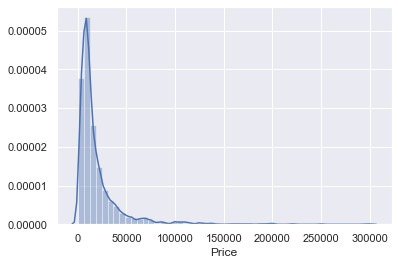

In [8]:
#creating PDFs for variables to identify outliers and determine transformation
sns.distplot(data_no_mv['Price'])

In [9]:
#There are obviously some outliers in the 'Price' variable
#$300K is too much for a used car unless it is a ultralux or exotic
#Let's see what is in this outlier sample

#Declare two values equal to the 99th and 98th percentiles of the 'Price' variable
q_98 = data_no_mv['Price'].quantile(0.98)
q_99 = data_no_mv['Price'].quantile(0.99)

#subset of data where price is in the 98th percentile or higher
data_98 = data_no_mv[data_no_mv['Price']>=q_98]

#change the display options for dataframe
pd.set_option('display.max_rows', None)

data_98

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
62,BMW,133000.0,crossover,7,4.40,Petrol,yes,2015,X5 M
104,Mercedes-Benz,107999.0,crossover,0,2.98,Diesel,yes,2016,GLS 350
131,Toyota,195000.0,crossover,0,4.50,Diesel,yes,2016,Land Cruiser 200
173,Mercedes-Benz,169000.0,other,1,4.70,Petrol,yes,2015,S 500
218,Toyota,135000.0,crossover,1,4.50,Diesel,yes,2011,Land Cruiser 200
234,Mercedes-Benz,109999.0,crossover,0,3.00,Diesel,yes,2016,GLS 350
348,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
438,Mercedes-Benz,195000.0,crossover,2,5.50,Petrol,yes,2016,GLS 63
445,Mercedes-Benz,115000.0,sedan,47,4.60,Petrol,yes,2013,S 500


In [10]:
#based on the above records and current price reseearch (kbb.com) these entries
#seem to all be double actual market values.

#To keep these records for training, we will divide all 'Prices' >= 98th %tile
#by half and save that as the new value.''
df = data_no_mv.copy()
df.loc[df['Price'] >= q_98, "Price"] = df['Price']/2


df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


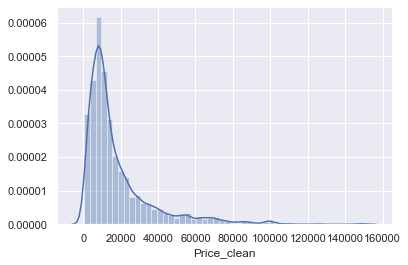

In [12]:
#Checking the PDF again to see what the distribution looks like now.
sns.distplot(data1['Price_clean'])

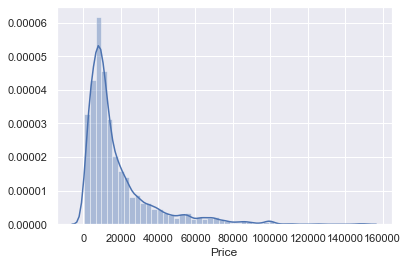

In [11]:
#Let's check the plot now with the corrected oulier values
sns.distplot(df['Price'])

There is still a skew present, but much more reasonable given the vehicles in our dataset.  

I think this is appropriate handling of the outliers on this variable.

#### Mileage

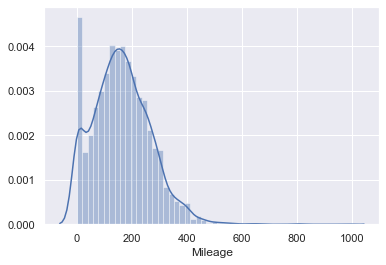

In [12]:
sns.distplot(df['Mileage'])

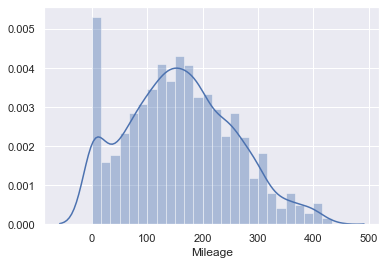

In [13]:
q = df['Mileage'].quantile(0.99)
data2 = df[df['Mileage']<q].copy()

#replot
sns.distplot(data2['Mileage'])

#### Engine Displacment

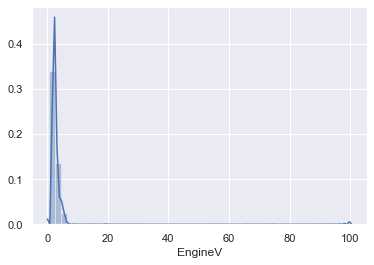

In [14]:
#Let's check it out
sns.distplot(data2['EngineV'])

In [15]:
#very skewed with outliers, let's look at the data
data2_a = data2.loc[(data2['EngineV'] >6.5)]
data2_a.describe()

,Price,Mileage,EngineV,Year
count,22.000000,22.000000,22.000000,22.000000
mean,7414.818182,197.954545,56.778636,2003.454545
std,5195.596117,84.983179,37.601889,6.223820
min,1950.000000,54.000000,7.200000,1989.000000
25%,3675.000000,129.000000,20.000000,2000.000000
50%,6300.000000,190.000000,60.500000,2005.000000
75%,9694.250000,261.500000,99.990000,2007.000000
max,25000.000000,350.000000,99.990000,2012.000000


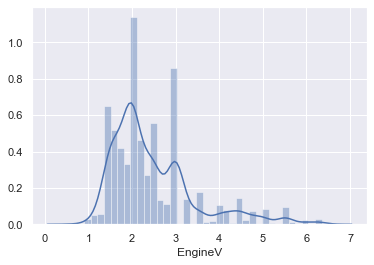

In [16]:
#since there are only 22 records, let's just remove them from the data.
data3 = data2[data2['EngineV']<=6.5].copy()

#replot
sns.distplot(data3['EngineV'])

#### Year

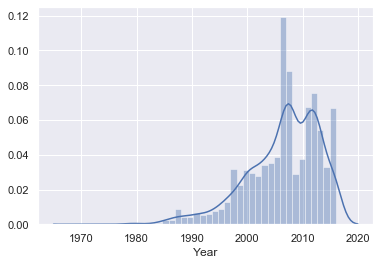

In [17]:
#checking out the 'Year' variable
sns.distplot(data3['Year'])

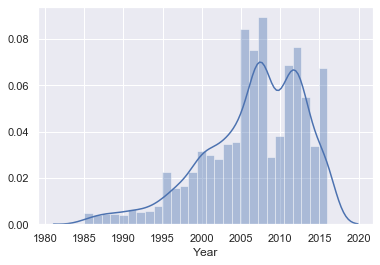

In [18]:
#left skew this time--volume seems low so I'll just remove anything prior to 1985
data4 = data3[data3['Year'] >= 1985].copy()

#replotting
sns.distplot(data4['Year'])

In [19]:
#Finally, let's reset the index and add the 'Age' variable
df = data4.reset_index(drop=True).copy()

#based on the 'Year' variable max = 2015 and this being a 2021 bootcamp,
#setting max 'Age' year = 2020
df['Age'] = 2020 - df['Year']

df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,29
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,21
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,17
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,13
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9


In [20]:
#let's check dtypes really quick
df.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
Age               int64
dtype: object

# 3. Feature Selection & Engineering
## Checking OLS Assumptions

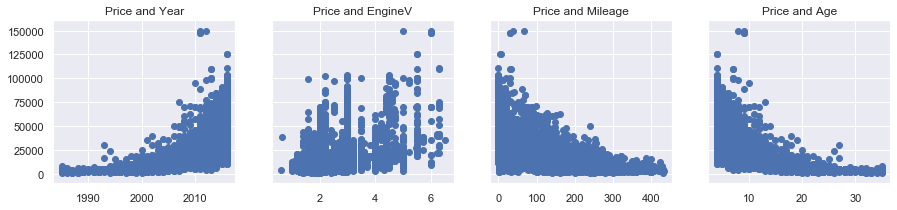

In [54]:
#Let's plot out the variables and check for reasonableness
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,3))
ax1.scatter(df['Year'],df['Price'])
ax1.set_title('Price and Year')
ax2.scatter(df['EngineV'],df['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(df['Mileage'],df['Price'])
ax3.set_title('Price and Mileage')
ax4.scatter(df['Age'],df['Price'])
ax4.set_title('Price and Age')

plt.show()

In [22]:
#Since price is exponentially distributed, lets use a log transformation
df['log_Price'] = np.log(df['Price'])

df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,log_Price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320,29,8.342840
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212,21,8.974618
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500,17,9.495519
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7,13,10.043249
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4,9,9.814656
5,Mercedes-Benz,99999.50,crossover,0,5.50,Petrol,yes,2016,GLS 63,4,11.512920
6,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,A6,14,9.560997
7,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,Megane,8,9.287209
8,Volkswagen,1400.00,other,212,1.80,Gas,no,1999,Golf IV,21,7.244228
9,Renault,11950.00,vagon,177,1.50,Diesel,yes,2011,Megane,9,9.388487


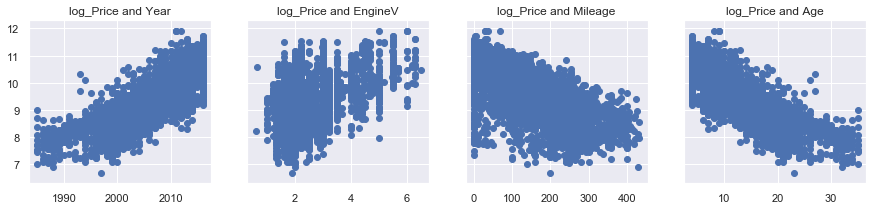

In [23]:
#checking our features again with log price
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,3))
ax1.scatter(df['Year'],df['log_Price'])
ax1.set_title('log_Price and Year')
ax2.scatter(df['EngineV'],df['log_Price'])
ax2.set_title('log_Price and EngineV')
ax3.scatter(df['Mileage'],df['log_Price'])
ax3.set_title('log_Price and Mileage')
ax4.scatter(df['Age'],df['log_Price'])
ax4.set_title('log_Price and Age')

plt.show()

In [24]:
#good linear fit. let's drop 'Price' and reset index
df_log = df.drop(['Price'],axis=1).reset_index(drop=True).copy()

df_log.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'Age', 'log_Price'], dtype=object)

## Check for Multicollinearity

In [25]:
#checking for collinearity between all numerical variables as categorical not yet preprocessed
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Putting all numerical variables into one
variables = df_log[['Mileage','Year','EngineV','Age']]

#creating a constant to use in the vif
X = add_constant(variables)

#Create a new dataframe to put all of our vifs
vif = pd.DataFrame()

#output the vifs from the variance inflation factors
vif['VIF'] = pd.Series([variance_inflation_factor(X.values,i)
                        for i in range(X.shape[1])],
                       index=X.columns)
vif['Features'] = X.columns

vif

C:\Users\Nercob\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Nercob\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
const,0.000000,const
Mileage,1.971272,Mileage
Year,inf,Year
EngineV,1.001445,EngineV
Age,inf,Age


In [26]:
#based on the perfect collinearty above, we'll drop 'Year' and rerun the vif
variables = df_log[['Mileage','EngineV','Age']]

#creating a constant to use in the vif
X = add_constant(variables)

#Create a new dataframe to put all of our vifs
vif = pd.DataFrame()

#output the vifs from the variance inflation factors
vif['VIF'] = pd.Series([variance_inflation_factor(X.values,i)
                        for i in range(X.shape[1])],
                       index=X.columns)
vif['Features'] = X.columns

vif

,VIF,Features
const,12.171060,const
Mileage,1.971272,Mileage
EngineV,1.001445,EngineV
Age,1.970568,Age


In [27]:
#Droping 'Year' looks good.  let's move forward with a new dataframe reflecting this.
df_new = df_log.drop(['Year'], axis=1)

## Create Dummy Variables

Turning categorical variables into dummies to include in regression.  Will look to convert Brand, Model, and Body.

In [28]:
# Creating our dataset with dummies
df_dummy = pd.get_dummies(df_new, drop_first=True)

pd.set_option('display.max_rows', None)

df_dummy.head()

,Mileage,EngineV,Age,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,29,8.342840,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,21,8.974618,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,17,9.495519,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,13,10.043249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9,9.814656,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_dummy.columns.values

array(['Mileage', 'EngineV', 'Age', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_21', 'Model_210',
       'Model_220', 'Model_230', 'Model_25', 'Model_250', 'Model_300',
       'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_325',
       'Model_328', 'Model_330', 'Model_335', 'Model_4 Series Gran Coupe',
       'Model_428', 'Model_4Runner', 'Model_5', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_524',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Mode

In [30]:
# Let's seperate our features from our target

Target = df_dummy['log_Price']

Features = df_dummy[['Mileage', 'EngineV', 'Age', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_21', 'Model_210',
       'Model_220', 'Model_230', 'Model_25', 'Model_250', 'Model_300',
       'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_325',
       'Model_328', 'Model_330', 'Model_335', 'Model_4 Series Gran Coupe',
       'Model_428', 'Model_4Runner', 'Model_5', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_524',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645', 'Model_650', 'Model_730', 'Model_735',
       'Model_740', 'Model_745', 'Model_750', 'Model_760', 'Model_80',
       'Model_9', 'Model_90', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris',
       'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_B 170',
       'Model_B 180', 'Model_B 200', 'Model_Beetle', 'Model_Bora',
       'Model_C-Class', 'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG',
       'Model_CL 550', 'Model_CL 63 AMG', 'Model_CLA 200',
       'Model_CLA 220', 'Model_CLA-Class', 'Model_CLC 180',
       'Model_CLC 200', 'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230',
       'Model_CLK 240', 'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430',
       'Model_CLS 350', 'Model_CLS 400', 'Model_CLS 500',
       'Model_CLS 63 AMG', 'Model_Caddy', 'Model_Camry', 'Model_Captur',
       'Model_Caravelle', 'Model_Carina', 'Model_Carisma', 'Model_Celica',
       'Model_Clio', 'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_GLS 500', 'Model_GLS 63',
       'Model_Galant', 'Model_Golf GTI', 'Model_Golf II',
       'Model_Golf III', 'Model_Golf IV', 'Model_Golf Plus',
       'Model_Golf V', 'Model_Golf VI', 'Model_Golf VII',
       'Model_Golf Variant', 'Model_Grand Scenic', 'Model_Grandis',
       'Model_Hiace', 'Model_Highlander', 'Model_Hilux', 'Model_I3',
       'Model_IQ', 'Model_Jetta', 'Model_Kangoo', 'Model_Koleos',
       'Model_L 200', 'Model_LT', 'Model_Laguna', 'Model_Lancer',
       'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Lite Ace',
       'Model_Logan', 'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB',
       'Model_ML 250', 'Model_ML 270', 'Model_ML 280', 'Model_ML 320',
       'Model_ML 350', 'Model_ML 400', 'Model_ML 430', 'Model_ML 500',
       'Model_ML 550', 'Model_ML 63 AMG', 'Model_Mark II', 'Model_Master',
       'Model_Matrix', 'Model_Megane', 'Model_Modus', 'Model_Multivan',
       'Model_New Beetle', 'Model_Outlander', 'Model_Outlander XL',
       'Model_Pajero', 'Model_Pajero Pinin', 'Model_Pajero Sport',
       'Model_Pajero Wagon', 'Model_Passat B2', 'Model_Passat B3',
       'Model_Passat B4', 'Model_Passat B5', 'Model_Passat B6',
       'Model_Passat B7', 'Model_Passat B8', 'Model_Passat CC',
       'Model_Phaeton', 'Model_Pointer', 'Model_Polo', 'Model_Previa',
       'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320',
       'Model_R8', 'Model_Rav 4', 'Model_S 140', 'Model_S 250',
       'Model_S 300', 'Model_S 320', 'Model_S 350', 'Model_S 400',
       'Model_S 430', 'Model_S 500', 'Model_S 550', 'Model_S 600',
       'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S-Guard', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Sprinter 324', 'Model_Symbol', 'Model_Syncro',
       'Model_T3 (Transporter)', 'Model_T4 (Transporter)',
       'Model_T5 (Transporter)', 'Model_T6 (Transporter)', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']].reset_index(drop=True).copy()

### Scale the Data

In [31]:
#Import the scaling module
from sklearn.preprocessing import StandardScaler

#Create a scaler object
scaler = StandardScaler()
scaler.fit(Features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
#scale the features and store them in a new variable
Features_scaled = scaler.transform(Features)

# 4. Train the Model
### Train Test Split

In [33]:
#Import the module for the split
from sklearn.model_selection import train_test_split

#split using an 80-20 and a random state of 365
X_train,X_Test, y_train, y_test = train_test_split(Features_scaled, Target, test_size=0.2, random_state=365)

### Create The Regression

In [34]:
#Create the linear regression object
reg = LinearRegression()

#Fit the regression with training data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

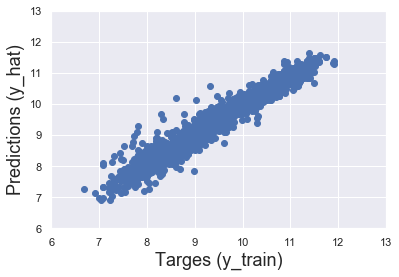

In [35]:
#checking the outputs and storing to y_hat
y_hat = reg.predict(X_train)

#Plot the targets to the predictions
plt.scatter(y_train, y_hat)
plt.xlabel('Targes (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

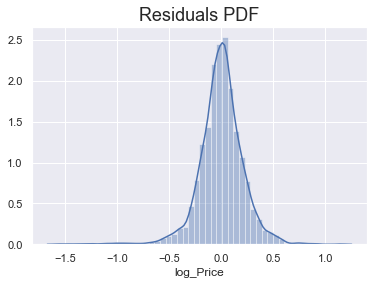

In [36]:
#now let's plot the residuals
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [37]:
#find the R-squared of the model
reg.score(X_train, y_train)

0.9417416483369419

### Finding the Weights and Bias

In [38]:
#obtain the bias (intercept) of the regression
reg.intercept_

-44556970279.97624

In [39]:
#obtain the weights (coefficients) of the regression
reg_summary = pd.DataFrame(Features.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-6.697363e-02
1,EngineV,6.182278e-02
2,Age,-5.611148e-01
3,Brand_BMW,4.341759e+11
4,Brand_Mercedes-Benz,4.752841e+11
5,Brand_Mitsubishi,1.344795e+11
6,Brand_Renault,-2.128894e+11
7,Brand_Toyota,1.193915e+12
8,Brand_Volkswagen,-3.994117e+12
9,Body_hatch,1.116943e-02


# 5. Testing the Model
## Compare Predictions to Test Targets

In [40]:
#Test the trained model against the test dataset
y_hat_test = reg.predict(X_Test)

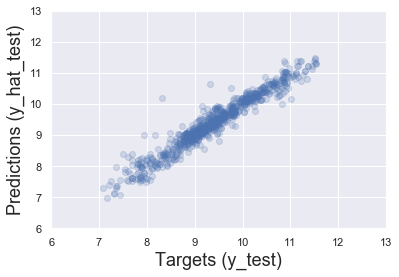

In [41]:
#Plot the test predictions against the ground truth
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [42]:
#Create a dataframe of our predictions and take the exponent of 'log_Price'
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction']).astype('float')
df_pf.head()

C:\Users\Nercob\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,Prediction
0,1880.439611
1,4271.393649
2,7458.193319
3,2496.048073
4,11454.588028


In [43]:
#reset the index
y_test = y_test.reset_index(drop=True)

#added the test targets to the dataframe 
df_pf['Target'] = np.exp(y_test)
#create the residuals
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
#Make % difference between targets and prediction
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

#Set dataframe data type float format to two decimals
pd.options.display.float_format = '{:.2f}'.format

#display data and sort ascending by difference
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
438,7298.78,7299.00,0.22,0.00
237,11292.15,11300.00,7.85,0.07
472,14688.25,14700.00,11.75,0.08
534,5409.44,5400.00,-9.44,0.17
789,9678.76,9700.00,21.24,0.22
126,15735.12,15700.00,-35.12,0.22
46,11926.89,11900.00,-26.89,0.23
448,6283.50,6300.00,16.50,0.26
726,5114.69,5100.00,-14.69,0.29
567,9960.43,9990.00,29.57,0.30


### Calculate MAE

In [44]:
#remove infinity values and store prediction and target variables
out = df_pf.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
y_true = out['Target']
y_pred = out['Prediction']

#Mean Absolute Error of the log prediction to the log target
mean_absolute_error(y_true, y_pred)

3138.4478738036205